In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
x = np.uint8([250])
y = np.uint8([10])

# 250+10 = 260 => 255
print(cv2.add(x,y))

# 250+10 = 260 % 256 = 4
print(x+y)

[[255]]
[4]


94


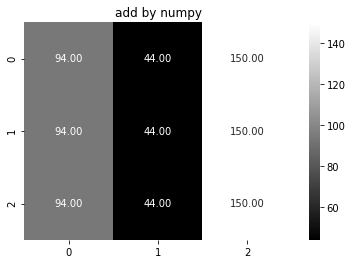

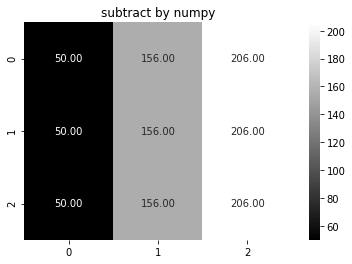

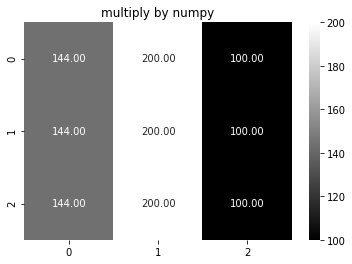

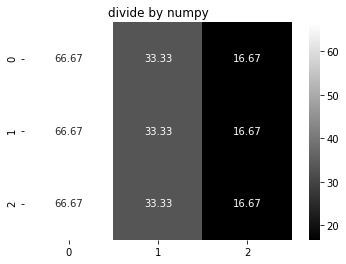

In [3]:
def show_heatmap(title,img):
  plt.figure(title)
  plt.title(title)
  sns.heatmap(img,annot=True,fmt='.2f',cmap=plt.cm.gray)
  plt.show()

x = np.array([[200,100,50],
              [200,100,50],
              [200,100,50]],
             dtype=np.uint8)
y = np.array([[150,200,100],
              [150,200,100],
              [150,200,100]],
             dtype=np.uint8
             )

add      = x + y
subtract = x - y
multiply = x * 2
divide   = x / 3

print( (200+150)%256) # modulo

show_heatmap('add by numpy',add)
show_heatmap('subtract by numpy',subtract)
show_heatmap('multiply by numpy', multiply)
show_heatmap('divide by numpy', divide)

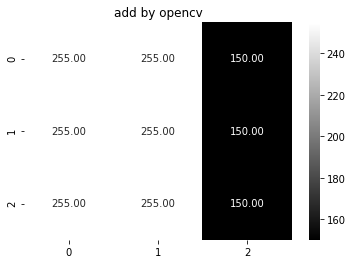

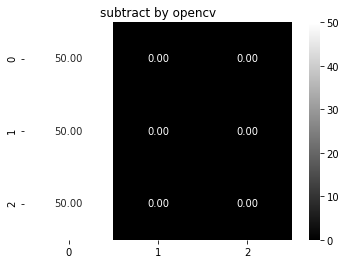

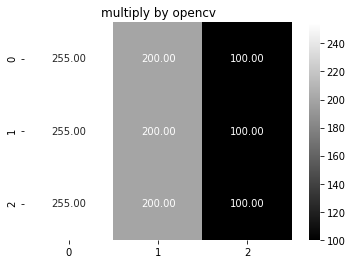

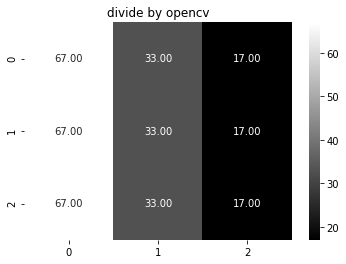

In [4]:
add      = cv2.add(x ,y)
subtract = cv2.subtract(x, y)
multiply = cv2.multiply(x ,2)
divide   = cv2.divide(x ,3)

show_heatmap('add by opencv',add)
show_heatmap('subtract by opencv',subtract)
show_heatmap('multiply by opencv', multiply)
show_heatmap('divide by opencv', divide)    # 200/3 = 66.666..... but in the case of opencv 200/3 = 67

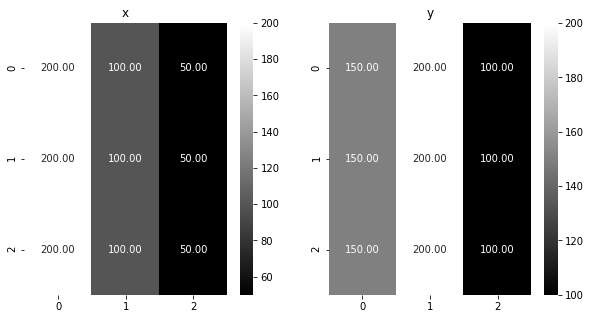

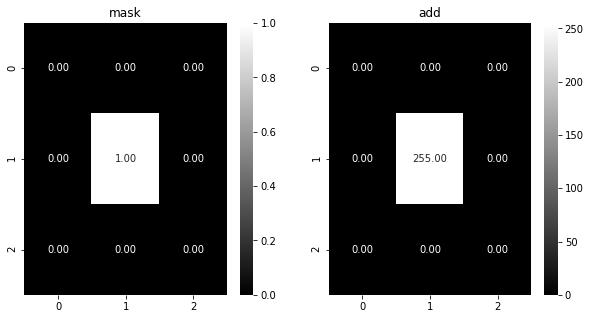

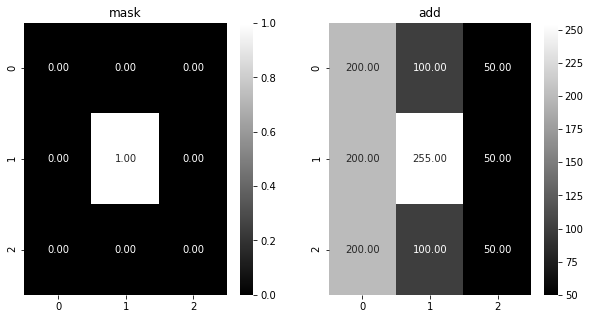

In [5]:
def draw_subheatmap(title_0, img_0, title_1, img_1):
  plt.figure(figsize=(10,5))
  plt.subplot(121)
  plt.gca().set_title(title_0)
  sns.heatmap(img_0,annot=True,fmt='.2f',cmap=plt.cm.gray)
  plt.subplot(122)
  plt.gca().set_title(title_1)
  sns.heatmap(img_1,annot=True, fmt='.2f', cmap=plt.cm.gray)

x = np.array([[200,100,50],
              [200,100,50],
              [200,100,50]],
             dtype=np.uint8)
y = np.array([[150,200,100],
              [150,200,100],
              [150,200,100]],
             dtype=np.uint8
             )

mask = np.zeros(shape=(3,3), dtype=np.uint8)
mask[1,1] = 1

draw_subheatmap('x',x,'y',y)

r = np.zeros(shape=(3,3), dtype=np.uint8)
cv2.add(x,y,r,mask=mask)
draw_subheatmap('mask',mask,'add',r)

cv2.add(x,y,x,mask=mask) # the result of addition will be stored to x
draw_subheatmap('mask',mask,'add',x)

In [ ]:
#Image Blending

(120, 98, 3)
(120, 98, 3)


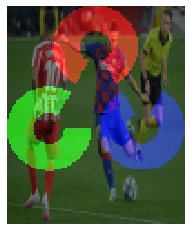

In [6]:
import os

colab_path = 'D:/'
fstr_0 = os.path.join(colab_path,'test.jpg')
fstr_1 = os.path.join(colab_path,'opencv_logo.png')

img_0 = cv2.imread(fstr_0)
img_1 = cv2.imread(fstr_1)
img_0 = cv2.resize(img_0, dsize=(img_1.shape[1],img_1.shape[0]), interpolation= cv2.INTER_AREA)
print(img_0.shape)
print(img_1.shape)

dst = cv2.addWeighted(img_0,0.5, img_1,0.5,0)


plt.imshow(dst[:,:,::-1])
plt.axis('off')
plt.show()

# cv2.imshow('dst',dst)
# cv2.waitKey(0)
# cv2.destroyWindow('dst')

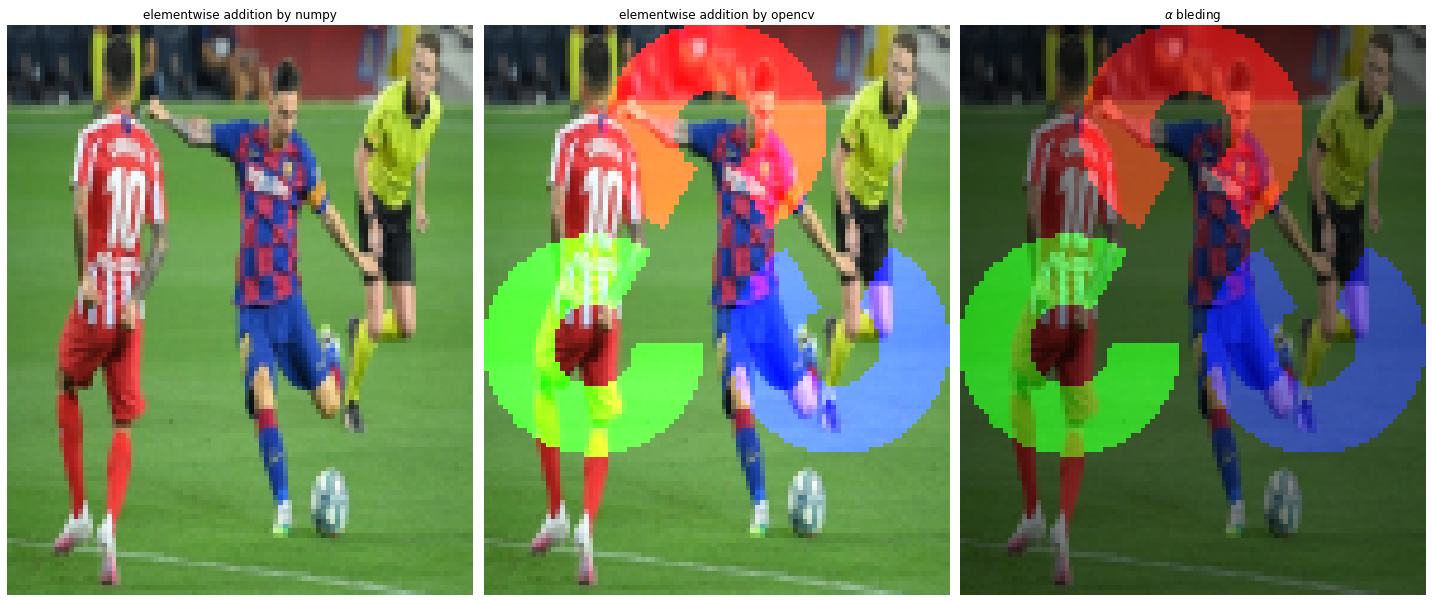

In [7]:
ret_0 = img_0+img_1
ret_1 = cv2.add(img_0, img_1)

plt.figure(figsize=(20,40))
plt.subplot(1,3,1)
plt.gca().set_title('elementwise addition by numpy')
plt.imshow(ret_0[:,:,::-1])
plt.gca().axis('off')
plt.subplot(1,3,2)
plt.gca().set_title('elementwise addition by opencv')
plt.imshow(ret_1[:,:,::-1])
plt.gca().axis('off')
plt.subplot(1,3,3)
plt.gca().set_title(r'$\alpha$ bleding')
plt.imshow(dst[:,:,::-1])
plt.gca().axis('off')

plt.tight_layout()
plt.show()

In [8]:
#face morphing

In [15]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def f(x):
  alpha = x/100
  ret = cv2.addWeighted(img_0, alpha, img_1, 1-alpha,0)
  plt.imshow(ret[:,:,::-1])

colab_path = 'D:/'
#fstr_0 = os.path.join(colab_path,'face02.PNG')
#fstr_1 = os.path.join(colab_path,'man_face.jpg')
fstr_0 = os.path.join(colab_path,'older.jpg')
fstr_1 = os.path.join(colab_path,'younger.jpg')

img_0 = cv2.imread(fstr_0)
resize_img_0 = cv2.resize(img_0, (1114, 1440))
img_1 = cv2.imread(fstr_1)
img_1 = cv2.resize(img_1, (1114, 1440))
img_0 = cv2.resize(img_0, dsize=(img_1.shape[1],img_1.shape[0]), interpolation= cv2.INTER_AREA)

interact(f, x=widgets.IntSlider(min=0, max=100, step=10, value=10, continuous_update=False));

interactive(children=(IntSlider(value=10, continuous_update=False, description='x', step=10), Output()), _dom_…